In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
custSeg_ds = pd.read_csv("D:/My Courses/DS internship/Final Project/Week7/cust_seg.csv",low_memory=False)

In [53]:
custSeg_ds.head()

,Unnamed: 0,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,...,0,0,0,0,0,0,0,0.0,0.0,0
1,1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0
4,4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,...,0,0,0,0,0,0,0,0.0,0.0,0


In [15]:
custSeg_ds = custSeg_ds.drop("Unnamed: 0",axis=1)

In [16]:
custSeg_ds.columns = ['data_date', 'customer_code', 'employee_index', 'customer_country_residence','customer_gender','age', 'bank_entry_date','new_customer_index', 'customer_seniority','first/primary_customer','last_date_as_primary_customer','customer_type_at_the_ beginning_of_the_month','customer_relation_type_at_the_beginning_of_the_ month','residence_index','foreign_index','spouse_index','type_of_channel','deceased_index_(N/S)','addres_type','province_code','province_name','activity_index','gross_income_of_the_ household','saving_account','guarantees','current_account','derivative_account','payroll_account','junior_account','mas_particular_account','particular_account','particular_plus_account','short_term_deposits','medium_term_deposits','long_term_deposits','e-account','funds','mortgage','pensions','loans','taxes','credit_card','securities','home_account','payroll','pensions','direct_debit']

In [17]:
custSeg_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   data_date                                              1000000 non-null  object 
 1   customer_code                                          1000000 non-null  int64  
 2   employee_index                                         989218 non-null   object 
 3   customer_country_residence                             989218 non-null   object 
 4   customer_gender                                        989214 non-null   object 
 5   age                                                    1000000 non-null  object 
 6   bank_entry_date                                        989218 non-null   object 
 7   new_customer_index                                     989218 non-null   float64
 8   customer_seniority     

In [63]:
custSeg_ds.head()

,data_date,customer_code,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [64]:
# Create table for missing/null data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [66]:
draw_missing_data_table(custSeg_ds)

,Total,Percent
spouse_index,999822,0.999822
last_date_as_primary_customer,998899,0.998899
gross_income_of_the_ household,175183,0.175183
province_name,17734,0.017734
province_code,17734,0.017734
type_of_channel,10861,0.010861
customer_gender,10786,0.010786
customer_relation_type_at_the_beginning_of_the_ month,10782,0.010782
activity_index,10782,0.010782
addres_type,10782,0.010782


In [19]:
custSeg_ds.isnull().sum().sum()

2371207

In [73]:
custSeg_ds["customer_code"].value_counts()

281941     2
362212     2
362218     2
362219     2
362220     2
          ..
1310578    1
1310579    1
1310645    1
1310643    1
1183305    1
Name: customer_code, Length: 626159, dtype: int64

In [76]:
boolean = custSeg_ds
['customer_code'].duplicated().any()
boolean

True

In [77]:
custSeg_ds.set_index('customer_code')

,data_date,employee_index,customer_country_residence,customer_gender,age,bank_entry_date,new_customer_index,customer_seniority,first/primary_customer,last_date_as_primary_customer,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
customer_code,,,,,,,,,,,,,,,,,,,,,
1375586,2015-01-28,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050611,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050612,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050613,2015-01-28,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1050614,2015-01-28,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183296,2015-02-28,N,ES,H,27,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1
1183295,2015-02-28,N,ES,H,56,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1183294,2015-02-28,N,ES,V,39,2013-09-25,0.0,22,1.0,NaN,...,0,0,0,0,0,0,0,0.0,0.0,1


In [83]:
custSeg_ds.describe()

,customer_code,new_customer_index,first/primary_customer,customer_type_at_the_ beginning_of_the_month,addres_type,province_code,activity_index,gross_income_of_the_ household,saving_account,guarantees,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pensions,direct_debit
count,1.000000e+06,989218.000000,989218.000000,989218.000000,989218.0,982266.000000,989218.000000,8.248170e+05,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,994598.000000,994598.000000,1000000.000000
mean,6.905967e+05,0.000489,1.109074,1.000085,1.0,26.852131,0.564971,1.396462e+05,0.000177,0.000039,...,0.009982,0.014553,0.004661,0.072581,0.066084,0.039378,0.006442,0.071629,0.079543,0.166275
std,4.044084e+05,0.022114,3.267624,0.012954,0.0,12.422924,0.495761,2.389858e+05,0.013303,0.006245,...,0.099410,0.119755,0.068112,0.259448,0.248429,0.194493,0.080003,0.257873,0.270584,0.372327
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.364110e+05,0.000000,1.000000,1.000000,1.0,18.000000,0.000000,7.157184e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.644760e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,1.066519e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074511e+06,0.000000,1.000000,1.000000,1.0,33.000000,1.000000,1.634325e+05,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'gross_income_of_the_ household')

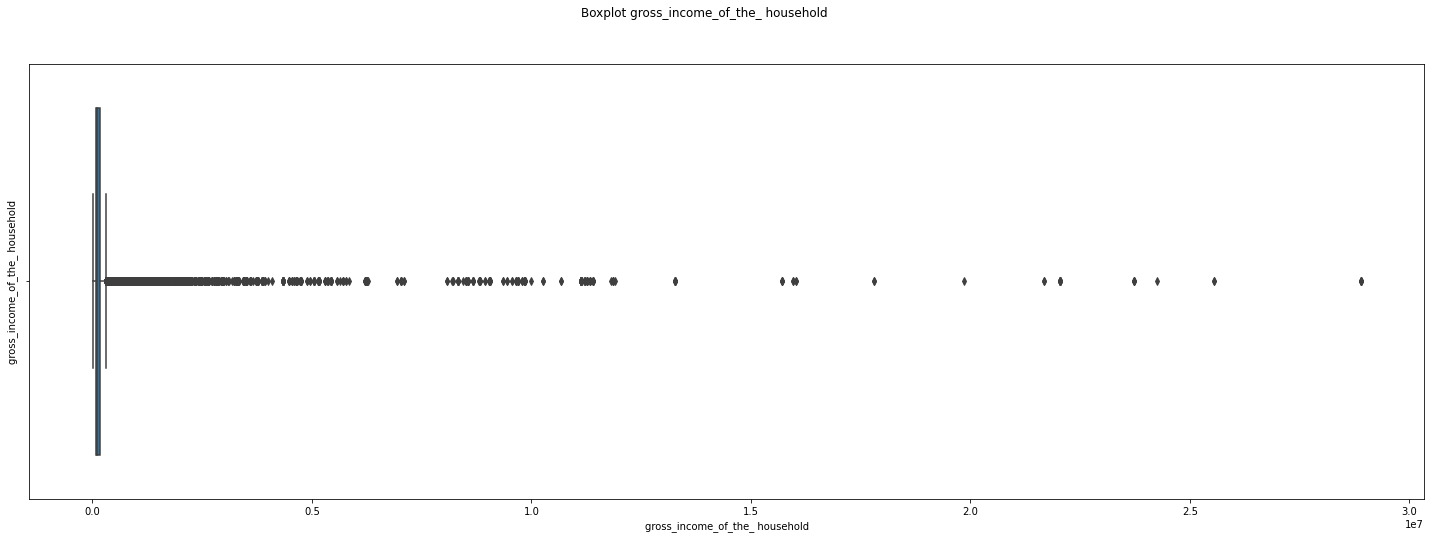

In [32]:
fig,axes = plt.subplots(figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot gross_income_of_the_ household')
sns.boxplot( x='gross_income_of_the_ household' , data=custSeg_ds ).set_ylabel("gross_income_of_the_ household")


In [33]:
duplicated_rows = custSeg_ds[custSeg_ds.duplicated()]
print('Duplicated rows:', duplicated_rows.shape[0])

Duplicated rows: 0


In [35]:
def outlier(col:str, df_:pd.DataFrame=custSeg_ds, remove:bool=False) -> list:
    """This function calculates the upper and lower fence
    of any column and can also remove from the dataset"""
    q1 = df_[col].quantile(0.25)
    q3 = df_[col].quantile(0.75)
    
    iqr = q3-q1
    lower_fence = q1 - iqr*1.5
    upper_fence = q3 + iqr*1.5

    if remove:
        temp = df_[(df_[col] > lower_fence) & (df_[col] < upper_fence)]
        return temp
    print('Upper and Lower Limits of gross_income_of_the_ household is:')
    return  [lower_fence, upper_fence]

In [36]:
outlier('gross_income_of_the_ household')

Upper and Lower Limits of gross_income_of_the_ household is:


[-66219.10500000001, 301223.41500000004]